![logo-uca-site-1.png](logo-uca-site-1.png)

# Université UCA

## Analyse Statistique

### Lab #4 - Lab 4 Modèle Toy case SEIR multi-agent

**Fleury Guillaume & Veysseyre Thomas**


# Analyse des Données du Modèle SEIR

Ce document contient un script Python qui est utilisé pour analyser les données issues de la simulation d'un modèle SEIR (Susceptible, Exposed, Infected, Recovered). Le script effectue les opérations suivantes :

1. **Lecture des fichiers CSV** : Les données sont extraites de fichiers CSV qui enregistrent le nombre d'agents dans chaque état (S, E, I, R) à chaque itération de la simulation.
2. **Génération de statistiques** : Des statistiques descriptives sont calculées pour chaque état, telles que la moyenne, le maximum, le minimum et l'écart-type.
3. **Tracé de graphiques** :
   - Un graphique pour chaque simulation individuelle montrant la progression des états SEIR au fil du temps.
   - Un graphique de la courbe moyenne qui illustre la dynamique moyenne des états SEIR sur toutes les simulations.

Les fichiers CSV doivent suivre un format spécifique où chaque ligne représente une itération de la simulation et contient les nombres d'agents dans les états Susceptible, Exposed, Infected et Recovered, dans cet ordre.

Avant de plonger dans l'analyse des résultats de notre simulation du modèle SEIR , il est essentiel de comprendre le fonctionnement du script Python que nous avons développé. Ce script joue un rôle crucial dans l'extraction, le traitement et la visualisation des données générées par notre modèle multi-agent. Voici le code et les explications:




# Importation des bibliothèques nécessaires pour l'analyse de données
```python
import pandas as pd  # Pandas pour la manipulation et l'analyse des données
import matplotlib.pyplot as plt  # Matplotlib pour la création de graphiques
import glob  # Glob pour la recherche de chemins selon un motif spécifié
import os  # OS pour l'interaction avec le système d'exploitation


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

### Fonction `print_stats`

La fonction `print_stats` prend en entrée un ensemble de données et un titre, puis affiche des statistiques pour ces données.

- `data`: L'ensemble de données pour lequel calculer et afficher des statistiques.
- `title`: Un titre qui sera affiché avant les statistiques pour identifier ce que représentent les données.

La fonction affiche les informations suivantes :
- La **moyenne** (la valeur moyenne pour chaque état dans l'ensemble des données).
- Le **maximum** (la valeur la plus élevée trouvée pour chaque état).
- Le **minimum** (la valeur la plus faible trouvée pour chaque état).
- L'**écart type** (une mesure de la quantité de variation ou de dispersion des valeurs pour chaque état).


In [15]:
def print_stats(data, title):
    print(f"----- {title} -----")
    print("Mean values for each state:")
    print(data.mean())
    print("\nMaximum values for each state:")
    print(data.max())
    print("\nMinimum values for each state:")
    print(data.min())
    print("\nStandard deviation for each state:")
    print(data.std())
    print("-------------------------------------------\n")

### Visualisation des Données du Modèle SEIR

#### Tracé de Chaque Simulation Individuelle

La fonction `plot_individual_runs` génère des graphiques pour chaque simulation individuelle :

- Prépare une nouvelle figure de taille 12x6 pouces pour le tracé.
- Itère à travers chaque dataframe, en traçant des courbes pour chaque état SEIR avec des transparences variées.
- Les premières lignes de chaque état sont complètement opaques pour la légende. Les suivantes sont plus transparentes.
- Définit un titre, des étiquettes d'axe, et affiche une légende pour le graphique.
- Montre le graphique créé.
- Regroupe ensuite toutes les données des simulations et utilise `print_stats` pour afficher les statistiques de ces simulations individuelles.


In [16]:
def plot_individual_runs(dataframes):
    plt.figure(figsize=(12, 6))
    for i, df in enumerate(dataframes):
        alpha = 0.1 if i > 0 else 1  # Full opacity for the first line to show legend
        plt.plot(df['Susceptible'], color='blue', alpha=alpha, label='Susceptible' if i == 0 else "")
        plt.plot(df['Exposed'], color='orange', alpha=alpha, label='Exposed' if i == 0 else "")
        plt.plot(df['Infected'], color='red', alpha=alpha, label='Infected' if i == 0 else "")
        plt.plot(df['Recovered'], color='green', alpha=alpha, label='Recovered' if i == 0 else "")
    plt.title('Individual Simulation Runs for SEIR Model')
    plt.xlabel('Time in days')
    plt.ylabel('Number of agents in each state')
    plt.legend()
    plt.show()

    # Print statistics for individual runs
    all_runs_data = pd.concat(dataframes)
    print_stats(all_runs_data, "Statistics for Individual Runs")

#### Tracé de la Moyenne des Simulations

La fonction `plot_average_curve` affiche la tendance moyenne des états SEIR sur toutes les simulations :

- Crée un graphique de taille 12x6 pouces.
- Trace les courbes moyennes pour chaque état : Susceptibles (bleu), Exposés (orange), Infectés (rouge) et Guéris (vert).
- Ajoute un titre et des légendes aux axes, puis affiche une légende et une grille pour une meilleure lisibilité.
- Affiche le graphique final à l'écran.
- Calcule et affiche les statistiques récapitulatives pour ces moyennes.

In [17]:
def plot_average_curve(mean_data):
    plt.figure(figsize=(12, 6))
    plt.plot(mean_data['Susceptible'], color='blue', label='Susceptible')
    plt.plot(mean_data['Exposed'], color='orange', label='Exposed')
    plt.plot(mean_data['Infected'], color='red', label='Infected')
    plt.plot(mean_data['Recovered'], color='green', label='Recovered')
    plt.title('Average SEIR Model Over Time')
    plt.xlabel('Time in days')
    plt.ylabel('Average number of agents in each state')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print statistics for the average curve
    print_stats(mean_data, "Statistics for Average Curve")


### Traitement des Données SEIR

La fonction `process_SEIR_data` est conçue pour préparer les données de simulation SEIR pour l'analyse :

- Elle recherche tous les fichiers CSV dans un répertoire donné qui correspondent au motif "SEIR*.csv".
- Chaque fichier CSV trouvé est lu et converti en un dataframe avec des colonnes nommées 'Susceptible', 'Exposed', 'Infected', et 'Recovered'.
- Si aucun fichier CSV n'est trouvé ou si tous les fichiers sont vides, la fonction avertit l'utilisateur et s'arrête.
- Elle compile ensuite toutes ces données dans une liste et calcule la moyenne pour chaque état à travers toutes les itérations.
- La fonction renvoie une liste de tous les dataframes individuels ainsi que le dataframe des moyennes calculées.


In [18]:
def process_SEIR_data(csv_folder_path):
    # Find all CSV files in the specified directory
    csv_files = glob.glob(os.path.join(csv_folder_path, "SEIR*.csv"))
    if not csv_files:
        print("No CSV files found in the specified directory.")
        return None, None
    
    dataframes = []
    
    # Read each CSV file and append to list
    for file in csv_files:
        try:
            df = pd.read_csv(file, header=None)
            df.columns = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
            dataframes.append(df)
        except pd.errors.EmptyDataError:
            print(f"Warning: The file {file} is empty and will be skipped.")
        except Exception as e:
            print(f"An error occurred while reading {file}: {e}")

    if not dataframes:
        print("No data to plot.")
        return None, None
    
    # Calculate the mean along the columns, which gives us the average number of agents in each state for each iteration
    mean_data = pd.concat(dataframes).groupby(level=0).mean()

    return dataframes, mean_data


### Analyse des Données SEIR

Nous lançons l'analyse en définissant le chemin vers les fichiers CSV comme le répertoire courant et en traitant les données avec les fonctions définies précédemment :

Après avoir expliqué notre approche de codage, nous procéderons à l'analyse des résultats. Nous interpréterons les graphiques générés et discuterons des implications des statistiques calculées pour comprendre les dynamiques de la propagation de la maladie dans la population simulée.

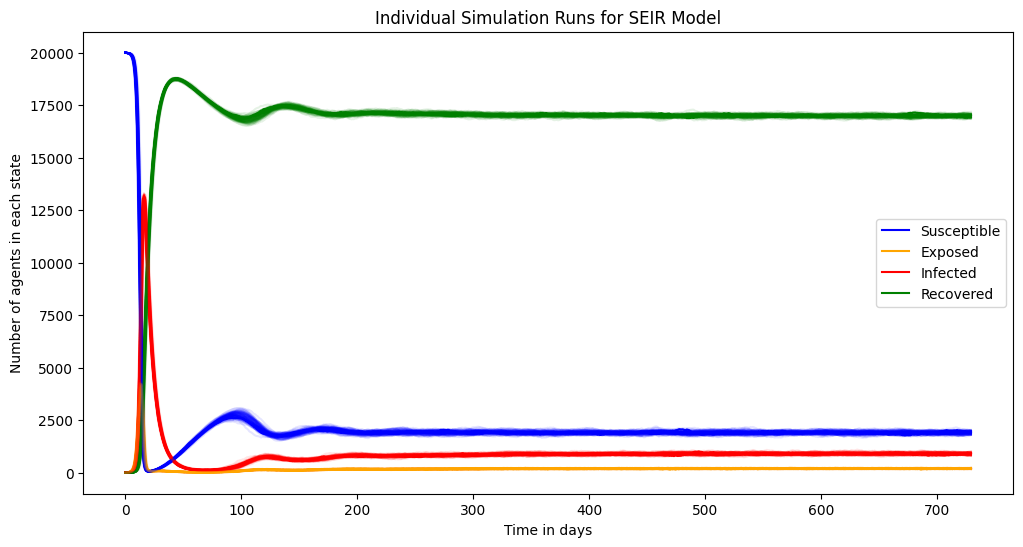

----- Statistics for Individual Runs -----
Mean values for each state:
Susceptible     2183.281699
Exposed          192.954082
Infected         956.253260
Recovered      16667.510959
dtype: float64

Maximum values for each state:
Susceptible    19990
Exposed         4400
Infected       13321
Recovered      18808
dtype: int64

Minimum values for each state:
Susceptible    46
Exposed         0
Infected        6
Recovered       0
dtype: int64

Standard deviation for each state:
Susceptible    2287.602710
Exposed         275.545258
Infected       1164.864630
Recovered      2586.719966
dtype: float64
-------------------------------------------



In [19]:
# Use the current working directory of the notebook for the CSV files path
csv_folder_path = os.getcwd()

# Call the function and process the CSV files
dataframes, mean_data = process_SEIR_data(csv_folder_path)
if dataframes is not None and mean_data is not None:
    plot_individual_runs(dataframes)

### Analyse des Simulations Individuelles du Modèle SEIR

Le graphique présenté illustre l'évolution temporelle des états Susceptible, Exposed, Infected et Recovered pour des simulations individuelles du modèle SEIR. Les points clés observés sont :

- **Susceptible**: La population susceptible diminue rapidement au début, ce qui indique une propagation rapide de l'infection.
- **Exposed**: Il y a un pic initial chez les individus exposés, suivie d'une décroissance, ce qui suggère que les individus passent à l'état infecté ou se rétablissent.
- **Infected**: La courbe des infectés montre également un pic, puis une décroissance, ce qui est cohérent avec le passage à l'état de récupération après la période d'infection.
- **Recovered**: Le nombre de récupérés augmente constamment, ce qui indique que les individus se rétablissent de l'infection et ne retournent pas à l'état susceptible, du moins sur la période observée.

Les statistiques associées révèlent :

- La **moyenne** des populations dans chaque état montre que le nombre de récupérés est significativement plus élevé que celui des autres états, ce qui est probablement dû au fait que les individus restent dans cet état jusqu'à la fin de la simulation.
- Les **valeurs maximales** enregistrées pour les exposés et les infectés indiquent les moments les plus critiques de la propagation de la maladie.
- Les **valeurs minimales** montrent que presque tous les états ont été presque vides à un moment donné, sauf pour les susceptibles qui ont le minimum à 46, suggérant que la maladie a été presque universellement propagée.
- L'**écart type** élevé chez les susceptibles reflète la grande variation initiale du nombre d'agents dans cet état.

En résumé, ces données et graphiques donnent une vue d'ensemble de la dynamique de la maladie dans la population modélisée. Les simulations individuelles mettent en évidence la variation dans la propagation de la maladie et l'impact des mécanismes de récupération et d'exposition.


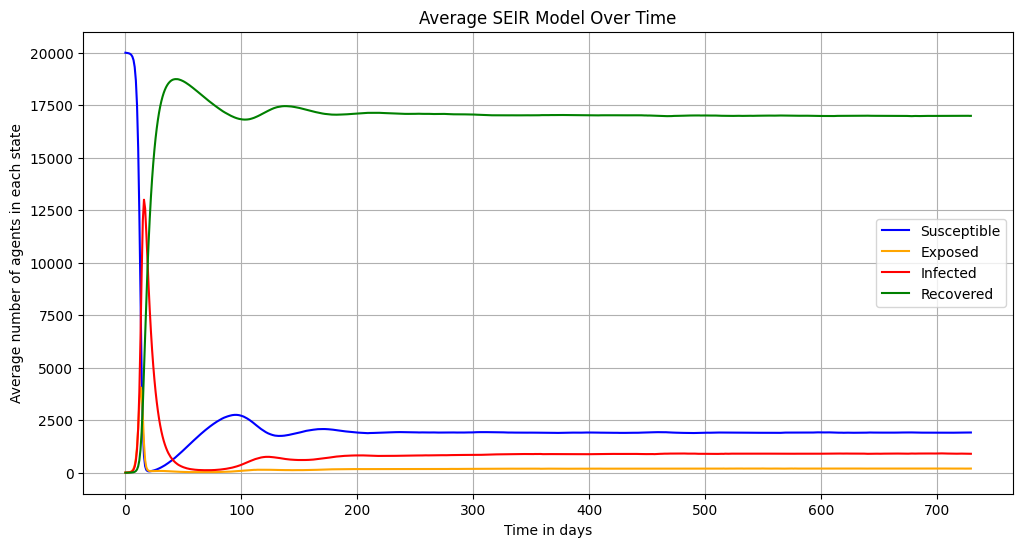

----- Statistics for Average Curve -----
Mean values for each state:
Susceptible     2183.281699
Exposed          192.954082
Infected         956.253260
Recovered      16667.510959
dtype: float64

Maximum values for each state:
Susceptible    19990.00
Exposed         4074.66
Infected       12993.23
Recovered      18734.70
dtype: float64

Minimum values for each state:
Susceptible    65.7
Exposed         0.0
Infected        8.8
Recovered       0.0
dtype: float64

Standard deviation for each state:
Susceptible    2284.197513
Exposed         270.984166
Infected       1159.593324
Recovered      2586.476031
dtype: float64
-------------------------------------------



In [20]:
if dataframes is not None and mean_data is not None:
    plot_average_curve(mean_data)

### Analyse de la Courbe Moyenne du Modèle SEIR

Le graphique "Average SEIR Model Over Time" montre l'évolution des états moyens dans la population simulée sur la durée de l'épidémie. Les tendances observables sont les suivantes :

- Les **Susceptibles** chutent rapidement au début, indiquant une propagation initiale rapide de l'infection.
- Les **Exposés** montent en flèche puis déclinent, ce qui reflète la période d'incubation suivie par la transition vers l'état infecté ou la récupération.
- Les **Infectés** atteignent un pic tôt avant de diminuer, représentant la période active de l'infection.
- Les **Rétablis** augmentent progressivement et se stabilisent, ce qui signifie que les individus restent dans cet état après la guérison.

Les statistiques pour la courbe moyenne mettent en évidence :

- Les valeurs **moyennes** indiquent un nombre élevé d'agents récupérés, montrant que la majorité des individus infectés sont passés par le processus de la maladie et ont atteint l'immunité ou la fin de la simulation.
- Les valeurs **maximales** et **minimales** montrent l'étendue des données pour chaque état, avec des valeurs maximales élevées pour les susceptibles et les rétablis, indiquant les phases de début et de fin de l'épidémie.
- L'**écart-type** est important pour les susceptibles et les rétablis, suggérant une variabilité significative dans ces états au fil du temps.

En résumé, cette analyse des données moyennées révèle la dynamique de l'épidémie et l'effet des processus de transmission, d'exposition, d'infection et de récupération dans la population modélisée.


## Comparaison des Résultats des Simulations SEIR

En comparant les résultats des simulations individuelles avec la courbe moyenne du modèle SEIR, plusieurs observations clés émergent :

- Les simulations individuelles montrent une variabilité significative, comme en témoignent les transparences des courbes qui représentent différentes trajectoires de l'épidémie. Cela suggère que chaque simulation peut avoir des résultats considérablement différents, reflétant le rôle du hasard dans la propagation de la maladie.

- La courbe moyenne offre un aperçu stabilisé de ces trajectoires, en adoucissant les fluctuations et en présentant une vision moyenne de l'évolution de l'épidémie.

- Les pics observés dans les états Exposed et Infected sont beaucoup plus prononcés dans les simulations individuelles, tandis que la courbe moyenne montre un pic plus modéré et plus étalé dans le temps. Cela indique que certains scénarios de simulation peuvent connaître des flambées plus sévères ou plus rapides que d'autres.

- La convergence des courbes Recovered dans les deux ensembles de données souligne un modèle cohérent de récupération au fil du temps.

### Conclusion Générale

En conclusion, les graphiques et les statistiques des simulations individuelles et de la courbe moyenne illustrent l'importance des analyses multiples pour comprendre les dynamiques épidémiques. Alors que chaque simulation individuelle peut varier, la moyenne offre un aperçu de l'évolution probable de l'épidémie à long terme.

Ces analyses mettent en lumière l'efficacité des interventions de santé publique et des stratégies de prévention. Une compréhension détaillée des différentes phases de la maladie et de leur impact sur la population est cruciale pour planifier et mettre en œuvre des mesures efficaces pour gérer et atténuer les effets d'une épidémie.
